## Análise de Custos de Seguro Médico

**Fonte:** https://www.kaggle.com/mirichoi0218/insurance 

Este código foi feito para estudar análise de dados e a biblioteca pandas. 

**Objetivo:** Investigar onde estão as pessoas de 18 anos que contrataram um seguro médico, quais os valores, incluindo o menor e maior, e quais os fatores que influenciaram nos valores.

In [1]:
import pandas as pd
import matplotlib

In [2]:
dataset = pd.read_csv("./dados/brutos/custo_saude/insurance.csv", sep=",", encoding='ISO-8859-1')

In [3]:
dataset # 1338 linhas e 7 colunas.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
 # Garantindo que os valores das colunas são iguais. 
dataset.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [5]:
# Criando uma lista para aplicar o filtro.
# O filtro faz com que os valores das colunas sejam selecionados pelo nome das colunas!!

colunas = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] 

In [6]:
# Aqui é criado uma variável que guarda os microdados + o filtro por colunas.
colunasSelect = dataset.filter(items=colunas)

In [7]:
# Atribuindo uma variável para cada coluna.
# Criação das Séries de cada coluna.

dadosAno = colunasSelect['age']
dadosSexo = colunasSelect['sex']
dadosMassa = colunasSelect['bmi']
dadosCrianca = colunasSelect['children']
dadosFuma = colunasSelect['smoker']
dadosRegiao = colunasSelect['region']
dadosCusto = colunasSelect['charges']

### Qual é a menor idade que já possui Seguro Médico dentre os 100?

In [8]:
dadosAno.value_counts().sort_index() #  Quantas linhas tem com cada idade?

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

Existem 69 pessoas com 18 anos que já possuem seguro médico.

- De onde são essas pessoas?
- Qual o valor dos seus seguros?
- Desses gastos, qual é o menor e existe algum motivo? (crianças, fuma ou não, região)

### Histograma - Quantidade de Pessoas Por Idade.

<AxesSubplot:>

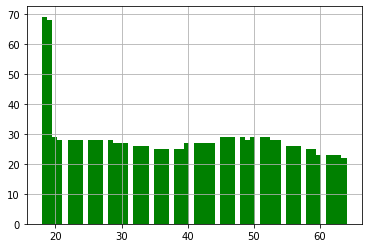

In [31]:
dadosAno.hist(bins=60, color='green')

### Quais são as principais idades por região?

#### Primeiramente, quantas pessoas temos por região?

In [50]:
# Criando um dataframe para análise de idade x local.

colunasSelecionadas = ['age', 'region']
dfIdadeLocal = dataset.filter(items=colunasSelecionadas)

# dataframeIdadeLocal.head()

Tradução das Regiões 

- southeast = sudeste
- northwest = noroeste
- southwest = sudoeste
- northeast = nordeste

In [51]:
# Valor bruto.
dadosRegiao.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Qual o **percentual** de pessoas com seguro médico por região?

In [35]:
distRegiao = dadosRegiao.value_counts()

In [42]:
# Para cada valor de distRegião, vamos multiplicar por 100 e dividir com a soma do distRegião.
#percentRegiao = [100*x/distRegiao.sum() for x in distRegiao]
percentRegiao = [ ( distRegiao/distRegiao.sum() ) * 100]

In [43]:
percentRegiao

[southeast    27.204783
 southwest    24.289985
 northwest    24.289985
 northeast    24.215247
 Name: region, dtype: float64]

**Atenção! Valores Arredondados.**

- southeast: 27.2%
- northwest: 24.3%
- southwest: 24.3%
- northeast: 24.2%

#### Histograma - Seguros por região.


<AxesSubplot:>

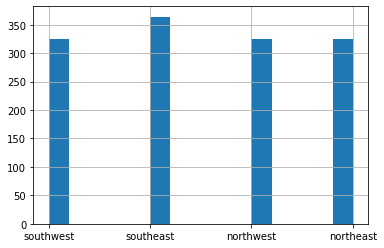

In [48]:
dadosRegiao.hist(bins=15)

#### Segundamente, dentro dessas regiões, quantas são as pessoas com 18 anos?

In [56]:
dfIdadeLocal[dfIdadeLocal.age == 18].groupby('region').count()

,age
region,
northeast,32
southeast,37


- Existem 32 pessoas com 18 anos no Nordeste.
- Existem 37 pessoas com 18 anos no Sudeste.

## Descobrindo qual é o valor do seguro.

#### Primeiramente, comecemos por Sudeste.

In [58]:
# Existem 37 pessoas com 18 anos nesta região.

dfSudesteIdade = dfIdadeLocal[dfIdadeLocal.region == 'southeast'].groupby('age').count()

# Visualizando.
dfSudesteIdade

,region
age,
18,37
19,3
20,8
21,7
22,8
23,7
24,7
25,7
26,7


In [59]:
# Criando um novo dataframe, dessa vez junto com os custos.

colunasSelecionadas2 = ['age', 'region', 'charges'] 
dfIdadeLocalCusto = dataset.filter(items=colunasSelecionadas2)

In [60]:
# dataframeIdadeLocalCusto[dataframeIdadeLocalCusto.age == 18]

dfSoutheast = dfIdadeLocalCusto[dfIdadeLocalCusto.region == 'southeast']
dfSoutheast.head()

,age,region,charges
1,18,southeast,1725.5523
2,28,southeast,4449.4620
5,31,southeast,3756.6216
6,46,southeast,8240.5896
11,62,southeast,27808.7251


#### Nesta região, qual o valor máximo de gastos com o seguro para a idade de 18 anos?

In [63]:
dfSoutheast[dfSoutheast.age == 18].max()

age                18
region      southeast
charges    38792.6856
dtype: object

#### E qual seria o valor mínimo de seguro para a mesma idade?

In [64]:
dfSoutheast[dfSoutheast.age == 18].min()

age               18
region     southeast
charges    1121.8739
dtype: object

- O valor mínimo de seguro é 1121.8739 (dolares).
- O valor máximo de seguro é 38792.6856 (dolares).

#### Realizando o mesmo processo com Nordeste.

In [65]:
# A variável serve para facilitar a aplicação de funções built-in na pesquisa.

dfNortheast = dfIdadeLocalCusto[dfIdadeLocalCusto.region == 'northeast']

In [66]:
dfNortheast[dfNortheast.age == 18].max()

age                 18
region       northeast
charges    34617.84065
dtype: object

In [67]:
dfNortheast[dfNortheast.age == 18].min()

age               18
region     northeast
charges    1694.7964
dtype: object

- O valor mínimo de seguro é 1694.7964 (dolares).
- O valor máximo de seguro é 34617.84065 (dolares).

## Investigando outras variáveis:

In [68]:
colunasSelecionadas3 = ['age', 'region','children', 'smoker', 'charges', ] 
dfOutras = dataset.filter(items=colunasSelecionadas3)

In [69]:
dfOutras[dfOutras.age == 18]

,age,region,children,smoker,charges
1,18,southeast,1,no,1725.55230
22,18,southeast,0,no,1137.01100
31,18,northeast,0,no,2198.18985
46,18,northeast,2,no,3393.35635
50,18,northeast,0,no,2211.13075
...,...,...,...,...,...
1296,18,northeast,0,no,1708.92575
1315,18,northeast,1,no,11272.33139
1317,18,southeast,0,no,1163.46270
1334,18,northeast,0,no,2205.98080


In [86]:
# O fato de ter uma criança implica no gasto do seguro? E o fato de ser fumante?

cond1 = dfOutras.children > 0
cond2 = dfOutras.age == 18

dfOutras[cond1 & cond2]

,age,region,children,smoker,charges
1,18,southeast,1,no,1725.55230
46,18,northeast,2,no,3393.35635
57,18,southeast,2,yes,34303.16720
250,18,northeast,2,yes,12829.45510
270,18,southeast,1,no,1719.43630
369,18,northeast,3,no,3481.86800
469,18,southeast,1,no,2201.09710
564,18,southeast,2,no,2801.25880
571,18,southeast,1,no,2219.44510
710,18,southeast,1,no,1727.54000
